# ML Models Overview

In [1]:
# Standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets


# We do this to ignore several specific warnings
#import warnings
#warnings.filterwarnings("ignore")

%matplotlib inline
# Set up Notebook
sns.set(style="white")

## Data Exploration

Cross Industry Standard Process for Data Mining (CRISP-DM) breaks the process of data mining into six major steps:
1. Business understanding
2. Data understanding
3. Data preparation
4. Modeling
5. Evaluation
6. Deployment  

The sequence of the phases is not strict and moving back and forth between different phases as it is always required

In [2]:
# Load the iris dataset   
iris = sns.load_dataset('iris', cache=True)   
# Check if the data was loaded correctly
iris.sample(5);

In [3]:
# Get some info
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
# Examine grouped data
iris.groupby('species').count()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,50,50,50,50
versicolor,50,50,50,50
virginica,50,50,50,50


In [5]:
# Get descriptive statistics
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


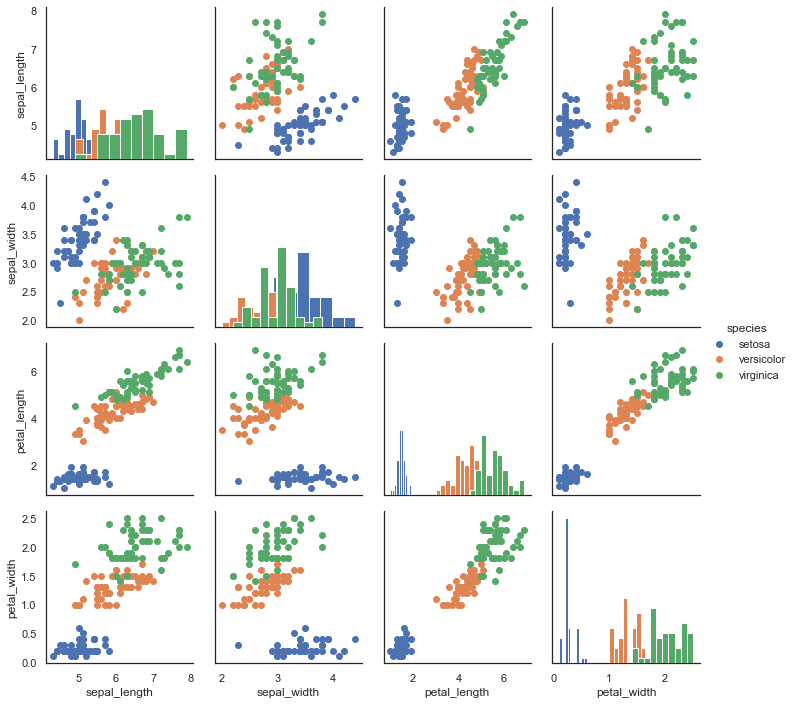

In [6]:
# Pair plot
g = sns.PairGrid(iris, hue='species')
g.map_diag(plt.hist) # with histograms down the diagonal
g.map_offdiag(plt.scatter) # and scatter plots of the diagonal
g.add_legend()

As we can see the three iris species cluster naturally in these dimensions, with a minimal overlap.  

## Scikit-Learn
Let's use sklearn to train a model and test for different machine learning algorithms.   
The sklearn module works directly on NumPy arrays and **not on a Pandas DataFrame**, so our next step is to build explicit data and label NumPy arrays.  
One caveat to this process is that the sklearn module expects two dimensional matrices (or arrays). Thus, if we have a vector (or one-dimensional array) for our data features, we must explicitly convert this to a two-dimensional matrix, which involves a call to the Numpy `np.reshape` method.

We can grab the underlying Numpy two-dimensional array from a DF by using the `values` attribute to select all four features

In [7]:
# From DF to array:
data = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [8]:
# transform iris labels to integer [0:3]
labels = np.array([i//50 for i in range(iris.shape[0])])
label_names = ['Setosa', 'Versicolor', 'Virginica']

With these new data structures, we can begin to apply machine learning algorithms from the scikit-learn module. But let's first generate one scatter plot that displays a larger version of the sepal width versus petal width

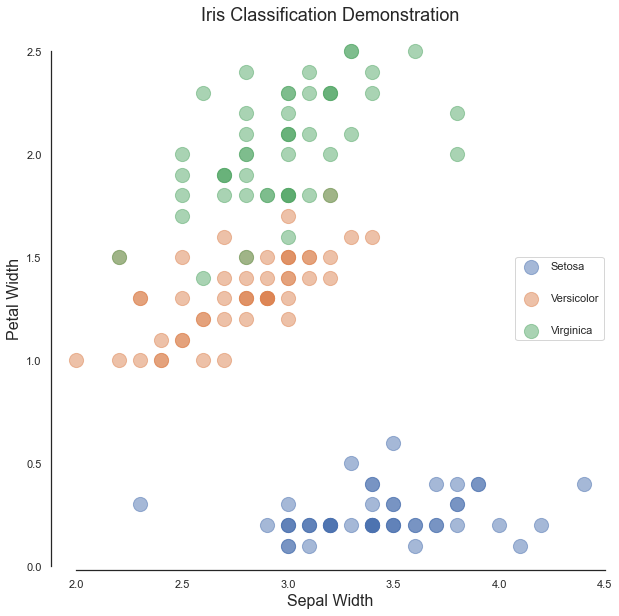

In [9]:
from matplotlib import cm

fig, aux = plt.subplots(figsize=(10, 10))

x = data[:, 1]
y = data[:, 3]
        
for idx in np.unique(labels):
    # Convert index into an int
    i = int(idx)
    plt.scatter(x[labels == i], y[labels == i], label=f'{label_names[i]}',
               s=200, alpha = .5, cmap=cm.coolwarm) 

# Decorate and clean plot
aux.set_xlabel('Sepal Width', fontsize=16)
aux.set_ylabel('Petal Width', fontsize=16)
aux.legend(loc = 7, labelspacing=2)
aux.set_title("Iris Classification Demonstration", fontsize=18)
sns.despine(offset=0, trim=True)

## Classification

The first type of algorithm we will demonstrate is calssification, where we train an estimator to generate a model for the prediction of discrete labels.   
The following code cell we perform k-Nearst Neighbors (KNN) classification by using scikit-learn. The standard classification process in scikit-learn is to: 
1. first devide the data into training and testing data sets 
2. we scale the data using a standard scaler to have zero mean and unit variance. Any scaling technique should be trained via the `fit` method on the training data used for the ml algorithm. 
3. We construct our KNN classification model with 5 neighbours as default.
4. We train our model using the `fit` method on the training data and labels
5. Then we compute an accuracy measurement for our trained algotithm by using the `score` method

Two variable have an impact on our accuracy score:
* the size of our testing sequence, and
* the number of k-nearst neighbors

We can play with following two scalers and see how they impact the classification's performance:

In [10]:
from sklearn.model_selection import train_test_split
from ipywidgets import interact, fixed
from sklearn import neighbors
from sklearn.preprocessing import StandardScaler

# Split data into training and testing
# Note that we ahve both 'data' and 'labels'


def nearst_neighbors(data, labels, test_size, random_state, nbrs=5):
    
    # I Data Pre-Processing
    # I.1 Split data into training and testing
    # Note that we have both 'data' and 'labels'
    d_train, d_test, l_train, l_test = train_test_split(data, labels, test_size=test_size, random_state=random_state)
    
    # I.2 Data Scaling
    # Create and fit scaler
    sc = StandardScaler().fit(d_train)
    d_train_sc = sc.transform(d_train)
    d_test_sc = sc.transform(d_test)

    # II Classification 
    # II.1 First we construct our model
    knn = neighbors.KNeighborsClassifier(n_neighbors=nbrs)
    
    # II.2 Now train our model
    knn.fit(d_train_sc, l_train)
    
    # II.3 Compute and display accuracy score
    score = 100.0 * knn.score(d_test_sc, l_test)
    
    # III Print Prediction accuracy
    print(f'Training data length: {len(d_train)}\n'
          f'Test data length: {len(d_test)}\n\n'
          f"KNN ({nbrs} neighbors) prediction accuracy = {score:5.1f}%")

In [11]:
a = widgets.interactive(nearst_neighbors, data=fixed(data), labels=fixed(labels), test_size=(0.25,0.61,0.01), 
                 random_state=fixed(23), nbrs=(2,10,1));

html = widgets.HTML('<b>Move the sliders and see how it impacts the predictions accuracy!</b>')
widgets.VBox([html, a])

## Regression
The second machine learning we are going to try is regression using decision tree.   
Before generating a regression model, we must pre-process our data to identify our independent variables (or features) and our dependent variable (feature). Given a set of new independent variables, a regression model will predict the dependent variable.

In [12]:
# Import the decision tree
from sklearn import tree

# Split out first three columns as our independent variables
# Last colum becomes our dependent variable
ind_data = data[:, 0:3]
dep_data = data[:, -1]

def decision_tree_regression(x, y, frac=0.4, criterion='mse'):
    # frac is the amount to hold out for 'blind' testing

    d_train, d_test, r_train, r_test \
        = train_test_split(x, y, test_size=frac, random_state=23)
    
    # Construct the tree regressor
    dtr = tree.DecisionTreeRegressor(criterion=criterion)
    # Fit the regressor to the training data
    dtr.fit(d_train, r_train)
    # Compute and display score from test data
    score = 100.0 * dtr.score(d_test, r_test)

    print(f'\nDT regression accuracy = {score:5.1f}%')

In [13]:
a = widgets.interactive(decision_tree_regression, x=fixed(ind_data), 
                        y=fixed(dep_data), frac=(0.25,0.61,0.01), 
                        criterion=["mse", "friedman_mse", "mae", "poisson"]);

html = widgets.HTML('<b>Move the slider or switch between regression algorithms  and see how it impacts the predictions accuracy!</b>')
widgets.VBox([html, a])

-----
The criterion is a parameter of the `DecisionTreeRegressor` and could be {"mse", "friedman_mse", "mae", "poisson"}. It defines the function to measure the quality of a split.    
Supported criteria are:
* "mse" for the mean squared error, which is equal to variance reduction as feature selection criterion and minimizes the L2 loss using the mean of each terminal node, 
* "friedman_mse", which uses mean squared error with Friedman's improvement score for potential splits,
* "mae" for the mean absolute error, which minimizes the L1 loss using the median of each terminal node, and 
* "poisson" which uses reduction in Poisson deviance to find splits.

## Dimensionality Reduction

When confronted with a large, multi-dimensional data set, one approach is to simplify any subsequent analysis to reduce the number of dimensions (or features) that must be processed.  In some cases, features can be removed from an analysis based on business logic, or the features that contain the most information can be quantified somehow. More generally, however, we can employ dimensional reduction, a machine learning technique that quantifies relationships between the original dimensions (or features, attributes, or columns of a DataFrame) to identify new dimensions that better capture the inherent relationships within the data.

The standard technique to perform this is known as principal component analysis (PCA). This process effectively rotates the data into a new set of dimensions, and by ranking the importance of the new dimensions, we can optimally select fewer dimensions for use in other machine learning algorithms.

We can easily implement PCA by using scikit-learn. The PCA estimator requires one tunable hyper-parameter that specifies the target number of dimensions. This value can be arbitrarily selected, perhaps based on prior information, or it can be iteratively determined. After the model is created, we fit the model to the data and next create our new, rotated data set. This is demonstrated in the next code cell.

In [14]:
# Principal Component Analysis
from sklearn.decomposition import PCA


def principal_comp_analysis(data, n_components=2):
# First create our PCA model

    global pca;
    # Fo now we assume two components to make plotting easier:
    pca = PCA(n_components=n_components)

    # Fit model to the data
    pca.fit(data)

    # Compute the transformed data (rotation to PCA space)
    data_reduced = pca.transform(data)

    # Need to modify to match number of PCA components
    comp = ['PCA1', 'PCA2', 'PCA3', 'PCA4']
    cols = comp[:n_components] + ['Species']

    # Now create a new DataFrame to hold the results
    # First a temporary np.array
    tmp_d = np.concatenate((data_reduced,
                            iris['species'].values.reshape((150, 1))), axis=1)
    iris_pca = pd.DataFrame(tmp_d, columns = cols)

    su = 0
    for idx, evr in enumerate(pca.explained_variance_ratio_):
        print(f'Component {idx + 1} explains {100.0* evr:4.2f} of the original variance.')
        su+=evr
    print(f'\nThese {n_components} dimensions capture {100.0 * su:4.1f}% of the variance in the original data.')

In [15]:
i = widgets.IntSlider(min=1, max=4, step=1)
a = widgets.interactive(principal_comp_analysis, data=fixed(data), 
                        n_components=i);

html = widgets.HTML('<b>Change the hyper-parameter n_component!</b>')
widgets.VBox([html, a])

At the end of the previous code cell, we measure the amount of the original variance (or spread) in the original data that is captured by each new dimension. As this example shows, these two new dimensions capture almost 98% of the variance in the original data. This means that any analysis that uses only these two new dimensions will closely represent the analysis if performed on the entire data.

Given the two new dimensions, we can also display how they are related to the original four dimensions (note that this isn't just a rotation, since we have actually reduced the number of dimensions).

In [16]:
# We can print out transformation matrix

out = widgets.Output()

@out.capture()
def pca_equation(change):
    #print(change)
    out.clear_output()
    # Original Attribute Names
    c_names = ['SL', 'SW', 'PL', 'PW']

    # For each principal component, print out the tranformation equation
    for row in pca.components_:
        print(r" + ".join("{0:6.3f} * {1:s}".format(val, name) 
                          for val, name in zip(row, c_names)))
        
i.observe(pca_equation,  names='value')
widgets.VBox([out])

## Clustering with K-means

* We start with a guess for the number of clusters (again this can be based on prior information or iteratively quantified). 
* We randomly place cluster centers in the data and determine how well the data cluster to these cluster centers.
* This information is used to pick new cluster centers, and the process continues until a solution converges (or we reach a predefined number of iterations).

We can employ k-means clustering with scikit-learn by using the `KMeans` estimator within the `cluster` module: 
* It requires the numbe of clusters to find as a hyper-parameter
* We also pass in the original, unscaled data since we will want the cluster centers in the original space spanned by our instances

After the model is created, we `fit` the model to the data and obtain our model predictions.

It is an unsupervised process, in that we do not use the label array in this process.

In [17]:
from sklearn.cluster import KMeans

def kmeans_clustering(data, n_clusters=3):
    # We build our model assuming three clusters
    k_means = KMeans(n_clusters, random_state=23)

    # We fit our data to assign classes
    k_means.fit(data)

    #print(k_means.cluster_centers_)
    # Define cluster centers (SW vs PW)
    xcc = k_means.cluster_centers_[:,1]
    ycc = k_means.cluster_centers_[:,3]
    # Now we create ou figure and axes fo r the plot we will make
    fig, ax = plt.subplots(figsize=(10, 10))

    for idx in np.unique(labels):
        # Convert index into an int
        i = int(idx)
        ax.scatter(x[labels == i], y[labels == i], label=f'{label_names[i]}', 
                   s=200, alpha=0.5, cmap=cm.coolwarm)

    # Plot cluster centers
    ax.scatter(xcc, ycc, marker='*', label='Cluster Centers', 
               s=500, alpha=0.75, cmap=cm.coolwarm)    

    # Decorate and clean plot
    ax.set_xlabel('Sepal Width', fontsize=16)
    ax.set_ylabel('Petal Width', fontsize=16)
    ax.legend(loc = 7, labelspacing=2)
    ax.set_title("Iris Cluster Demonstration", fontsize=18)
    sns.despine(offset=0, trim=True)

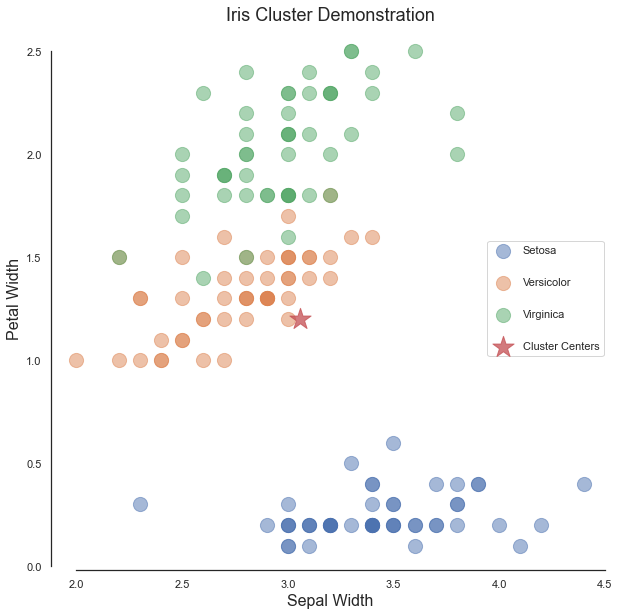

In [18]:
clusters = widgets.IntSlider(min=1, max=4, step=1)
a = widgets.interactive(kmeans_clustering, data=fixed(data), 
                        n_clusters=clusters);

html = widgets.HTML('<b>Change the hyper-parameter n_component!</b>')
widgets.VBox([html, a])


# Model Persistence

As the previous code cells demonstrate, we can generate machine learning models rather easily for small data sets by using the `scikit-learn` library. For larger data sets however, it can take considerable time and effort. As a result, we may wish to persist a trained machine learning model so that it can be applied to new data at a later time.  

The scikit-learn library supports [model persistence](https://bit.ly/3tWsqgg) by using either the standard Python pickle approach to saving data, or the more robust [joblib](https://bit.ly/3uXtWjE) approach, which efficiently scales to larger and more complex data.

This approach is demostrated as follows:

```python
import joblib

# 1. persist our k-nearest neighbor classification model to a file
filename = 'knn-model.pkl'
with open(filename, 'wb') as fout:
    joblib.dump(knn, fout)
    
# 2. Display saved model
!ls -la $filename

# Open model file and load model
with open(filename, 'rb') as fin:
    new_knn = joblib.load(fin)
    
# 3. Compute and display accuracy score
score = 100.0 * new_knn.score(d_test_sc, l_test)
print(f"New KNN model ({nbrs} neighbors) prediction accuracy = {score:5.1f}%\n")

# 4. Create and predict class for fake instance
sample_iris = [[6.2, 3.4, 2.3, 4.5]]
print(f'Prediction w/ old model = {knn.predict(sample_iris)[0]:d}')
print(f'Prediction w/ new model = {new_knn.predict(sample_iris)[0]:d}')

# 5. Delete saved model
!rm -rf $filename
```